## Data Preparation

In [22]:
# Importing nltk libarary
import nltk
import random
from collections import Counter

# Downloading the movie-review datase
nltk.download('movie_reviews')

# Basic Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importing the required functions for pre-processing the dataset

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download the requirements
nltk.download('stopwords')
nltk.download("punkt")
nltk.download('wordnet')
stopwords = set(stopwords.words('english'))


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/paarthvisharma/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paarthvisharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/paarthvisharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/paarthvisharma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from nltk.corpus import movie_reviews

# Access the movie reviews and labels
documents = [(list(movie_reviews.words(fileid)), category)
for category in movie_reviews.categories()
for fileid in movie_reviews.fileids(category)]
# Shuffle the documents to ensure a balanced distribution of positive and negative reviews
random.shuffle(documents)

In [4]:
# Review the results
print(documents[0][0])
print(documents[0][1])

['--', 'comedy', ',', 'rated', 'pg', ',', 'runs', 'about', '1', ':', '40', '--', 'starring', ':', 'john', 'goodman', ',', 'kathy', 'moriarty', ',', 'and', 'a', 'bunch', 'of', 'teenagers', '--', 'directed', 'by', 'joe', 'dante', 'and', 'written', 'by', 'charles', 'hass', '--', 'summary', ':', 'lawrence', 'woolsley', '(', 'john', 'goodman', ')', 'brings', 'his', 'new', 'horror', 'film', 'mant', '!', 'to', 'premiere', 'in', 'key', 'west', 'during', 'the', 'height', 'of', 'the', 'cuban', 'missile', 'crisis', '.', 'he', 'hopes', 'to', 'capitalize', 'on', 'the', 'tense', 'moment', 'by', 'providing', 'an', 'escape', 'for', 'the', 'town', '.', 'we', 'see', 'most', 'of', 'the', 'events', 'through', 'the', 'stories', 'of', 'four', 'teenagers', 'and', 'how', 'life', 'affects', 'them', '.', 'quick', 'and', 'easy', 'review', ':', 'i', 'really', 'enjoyed', 'matinee', '.', 'the', 'mixture', 'of', 'comedy', 'and', 'tension', 'blended', 'nicely', '.', 'unlike', 'many', 'comedies', 'this', 'film', 'trie

In [5]:
# Exploring the dataset

# Fequency distribution of most common words
nltk.FreqDist(movie_reviews.words()).most_common(15)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595)]

In [7]:
# Printing file IDs of first ten pos reviews
movie_reviews.fileids('pos')[:10]

['pos/cv000_29590.txt',
 'pos/cv001_18431.txt',
 'pos/cv002_15918.txt',
 'pos/cv003_11664.txt',
 'pos/cv004_11636.txt',
 'pos/cv005_29443.txt',
 'pos/cv006_15448.txt',
 'pos/cv007_4968.txt',
 'pos/cv008_29435.txt',
 'pos/cv009_29592.txt']

In [8]:
# Printing file IDs of first ten neg reviews
movie_reviews.fileids('neg')[:10]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt']

In [9]:
# Printing words with ID pos/cv995_21821.txt
movie_reviews.words('pos/cv995_21821.txt')

['wow', '!', 'what', 'a', 'movie', '.', 'it', "'", 's', ...]

In [10]:
# Print the first review and its label
print("Sample Review:", documents[0][0][:10]) # Displaying the first 10 words for brevity
print("Label:", documents[0][1])

Sample Review: ['--', 'comedy', ',', 'rated', 'pg', ',', 'runs', 'about', '1', ':']
Label: pos


In [20]:
# Preprocessing
# Instances for Lemmatization 
lemmatizer = WordNetLemmatizer()

processed_data = []

# Iterating through the words and respective categories in doctumenst
for words, category in documents:

    
    # Using the word tokentizer library from nltk to create tokens
    token_data = word_tokenize(" ".join(words))
    # Removing the stop words
    filtered_token_data = [token.lower() for token in token_data if token.lower() not in stopwords]
    # Lemmatization
    lemmatized_token_data = [lemmatizer.lemmatize(token) for token in filtered_token_data]

    # Appending the processed output with categories
    processed_data.append((lemmatized_token_data, category))

In [21]:
print("Original Words:", documents[0][0])
print("Preprocessed Words:", processed_data[0][0])
print("Category:", processed_data[0][1])

Original Words: ['--', 'comedy', ',', 'rated', 'pg', ',', 'runs', 'about', '1', ':', '40', '--', 'starring', ':', 'john', 'goodman', ',', 'kathy', 'moriarty', ',', 'and', 'a', 'bunch', 'of', 'teenagers', '--', 'directed', 'by', 'joe', 'dante', 'and', 'written', 'by', 'charles', 'hass', '--', 'summary', ':', 'lawrence', 'woolsley', '(', 'john', 'goodman', ')', 'brings', 'his', 'new', 'horror', 'film', 'mant', '!', 'to', 'premiere', 'in', 'key', 'west', 'during', 'the', 'height', 'of', 'the', 'cuban', 'missile', 'crisis', '.', 'he', 'hopes', 'to', 'capitalize', 'on', 'the', 'tense', 'moment', 'by', 'providing', 'an', 'escape', 'for', 'the', 'town', '.', 'we', 'see', 'most', 'of', 'the', 'events', 'through', 'the', 'stories', 'of', 'four', 'teenagers', 'and', 'how', 'life', 'affects', 'them', '.', 'quick', 'and', 'easy', 'review', ':', 'i', 'really', 'enjoyed', 'matinee', '.', 'the', 'mixture', 'of', 'comedy', 'and', 'tension', 'blended', 'nicely', '.', 'unlike', 'many', 'comedies', 'this

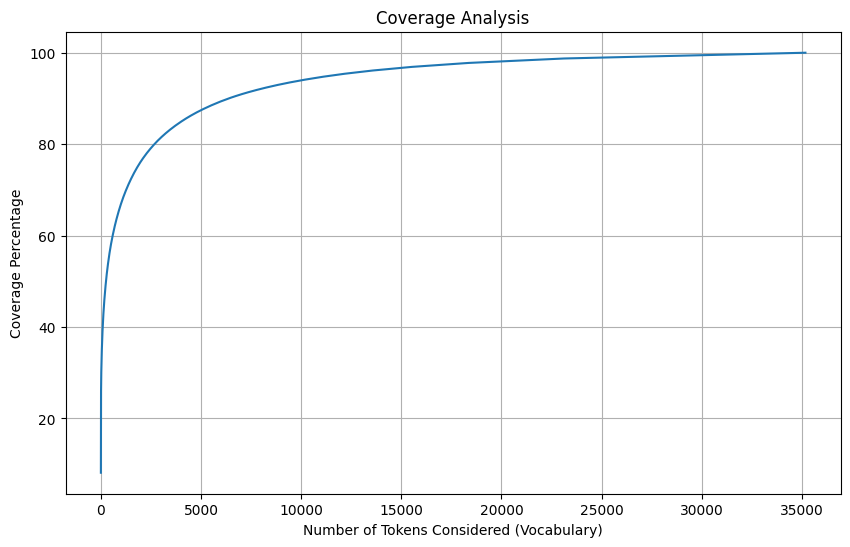

In [41]:
preprocessed_data_words = [word for doc, _ in processed_data for word in doc]

# Counting the frequency of words
frequency = Counter(preprocessed_data_words)

# Sorting words by frequency
words_sorted = sorted(frequency, key=frequency.get, reverse=True)

# Calculate cumulative coverage
coverage = []
word_unique = 0
total = sum(frequency.values())

for word in words_sorted:
    word_unique += frequency[word]
    temp = word_unique / total * 100
    coverage.append(temp)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(coverage)
plt.xlabel('Number of Tokens Considered (Vocabulary)')
plt.ylabel('Coverage Percentage')
plt.title('Coverage Analysis')
plt.grid(True)
plt.show()

## Coverage Analysis Discussion and Rationalization for Vocabulary Choice:

From the graph, we can observe that as the number of tokens or words in the vocabulary increases, the coverage percentage depicts a logarithmic increase pattern which means that additions to the vocabulary contribute significantly to increasing coverage. 

We can also note that the rate of increase in coverage starts to stabilize when the vocabulary token count reaches approximately 30,000.

Depending on the desired coverage, we can stop training early on. After a point, to increase the coverage by a small number we will have to train for much more iterations. This can be seen from the above graph. We achieve 90% coverage when our vocabulary size is 7500. But to achieve a coverage of 95% we need a vocabulary size of 12500.

The decision on vocabulary size is a balancing act. It involves considering the computational resources, the nature of the text data, the specifics of the application, and the characteristics of the chosen algorithms. A smaller vocabulary may lead to faster, more efficient models but at the risk of losing potentially valuable information. Conversely, a larger vocabulary could capture more details but may lead to increased complexity, slower performance, and potential overfitting.

## Algorithm Implementation 

In [25]:
# Vectors
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Model Selection
from sklearn.model_selection import train_test_split


# Evaluation metrics
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import classification_report


In [26]:
X = [" ".join(tokens) for tokens, category in processed_data]
y = [category for tokens, category in processed_data]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.20, random_state=42)

In [28]:
# TF feature representations
tf = CountVectorizer()
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

# TF-IDF feature representations
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Naive Bayes

In [29]:
# Creating instanaces of  Multinomial Naive Bayes
naive_bayes_tf = MultinomialNB()
naive_bayes_tfidf = MultinomialNB()

# Training with TF and TFIDF feature represntation
naive_bayes_tf.fit(X_train_tf, y_train)
naive_bayes_tfidf.fit(X_train_tfidf, y_train)

# Predicting 
y_pred_nb_tf = naive_bayes_tf.predict(X_test_tf)
y_pred_nb_tfidf = naive_bayes_tfidf.predict(X_test_tfidf)

In [30]:
# Evaluating the model with TF features
accuracy_nb_tf = accuracy_score(y_test, y_pred_nb_tf)
report_nb_tf = classification_report(y_test, y_pred_nb_tf)
print("Accuracy with TF feature representations for Naive Bayes", accuracy_nb_tf)
print("Classification Report with TF feature representations for Naive Bayes", report_nb_tf)

Accuracy with TF feature representations for Naive Bayes 0.8275
Classification Report with TF feature representations for Naive Bayes               precision    recall  f1-score   support

         neg       0.82      0.83      0.83       200
         pos       0.83      0.82      0.83       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [31]:
# Evaluating the model with TFIDF features
accuracy_nb_tfidf = accuracy_score(y_test, y_pred_nb_tfidf)
report_nb_tfidf = classification_report(y_test, y_pred_nb_tfidf)
print("Accuracy with TFIDF feature representations for Naive Bayes", accuracy_nb_tfidf)
print("Classification Report with TFIDF feature representations for Naive Bayes", report_nb_tfidf)

Accuracy with TFIDF feature representations for Naive Bayes 0.825
Classification Report with TFIDF feature representations for Naive Bayes               precision    recall  f1-score   support

         neg       0.81      0.85      0.83       200
         pos       0.84      0.80      0.82       200

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



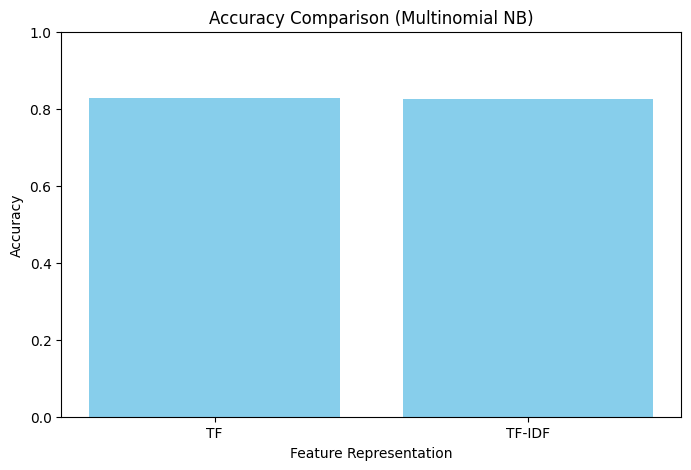

In [32]:
# Plot the comparison
algorithms = ['TF', 'TF-IDF']
accuracies = [accuracy_nb_tf, accuracy_nb_tfidf]

plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Feature Representation')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison (Multinomial NB)')
plt.ylim(0, 1)  
plt.show()

# Logistic Regression

In [33]:
# Creating instanaces of  Logistic Regression
lr_tf = LogisticRegression()
lr_tfidf = LogisticRegression()

# Training with TF and TFIDF feature represntation
lr_tf.fit(X_train_tf, y_train)
lr_tfidf.fit(X_train_tfidf, y_train)

# Predicting 
y_pred_lr_tf = lr_tf.predict(X_test_tf)
y_pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)

In [34]:
# Evaluating the model with TF features
accuracy_lr_tf = accuracy_score(y_test, y_pred_lr_tf)
report_lr_tf = classification_report(y_test, y_pred_lr_tf)
print("Accuracy with TF feature representations for Logistic Regression", accuracy_lr_tf)
print("Classification Report with TF feature representations for Logistic Regression", report_lr_tf)

Accuracy with TF feature representations for Logistic Regression 0.8225
Classification Report with TF feature representations for Logistic Regression               precision    recall  f1-score   support

         neg       0.82      0.82      0.82       200
         pos       0.82      0.82      0.82       200

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [35]:
# Evaluating the model with TFIDF features
accuracy_lr_tfidf = accuracy_score(y_test, y_pred_lr_tfidf)
report_lr_tfidf = classification_report(y_test, y_pred_lr_tfidf)
print("Accuracy with TFIDF feature representations for Logistic Regression", accuracy_lr_tfidf)
print("Classification Report with TFIDF feature representations for Logistic Regression", report_lr_tfidf)

Accuracy with TFIDF feature representations for Logistic Regression 0.8425
Classification Report with TFIDF feature representations for Logistic Regression               precision    recall  f1-score   support

         neg       0.86      0.81      0.84       200
         pos       0.82      0.87      0.85       200

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



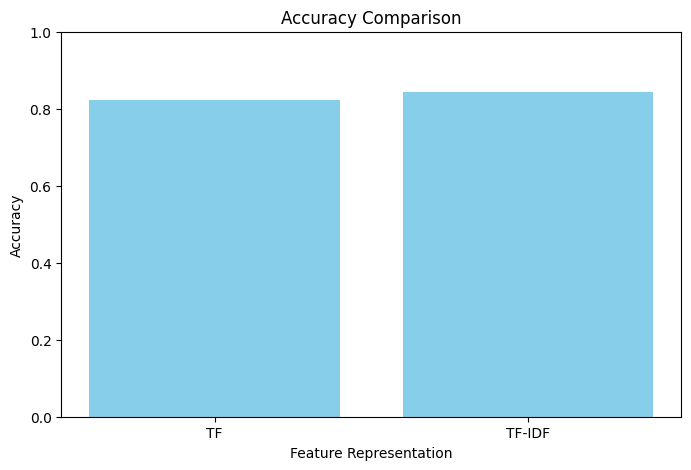

In [42]:
# Plotting the comparison
algorithms = ['TF', 'TF-IDF']
accuracies = [accuracy_lr_tf, accuracy_lr_tfidf]

plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Feature Representation')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)  
plt.show()

# MLP

In [40]:
# Creating a list with various hidden layer sizes to test the MLP model
mlp = [
    (50,),            # Single hidden layer - 50 neurons
    (100,),           # Single hidden layer - 100 neurons
    (50, 50),         # 2 hidden layers - 50 neurons each
    (50, 100),        # 2 hidden layers - 50 neurons each and 100 neuron each
]


toReturn = []

# Iterating though the various sizes in the list and assigning them to the hidden layer parameter
for architecture in mlp:

    # Instance of MLP Classififer for TF and TFIDF feature represenations 
    mlp_tf = MLPClassifier(hidden_layer_sizes=architecture, max_iter=300, random_state=42)
    mlp_tfidf = MLPClassifier(hidden_layer_sizes=architecture, max_iter=300, random_state=42)

    # Fitting both the models
    mlp_tf.fit(X_train_tf, y_train)
    mlp_tfidf.fit(X_train_tfidf, y_train)

    # Predicting on the testing set
    y_pred_mlp_tf = mlp_tf.predict(X_test_tf)
    y_pred_mlp_tfidf = mlp_tfidf.predict(X_test_tfidf)

    # Calculating the accuracy and other metrics for both the models
    accuracy_mlp_tf = accuracy_score(y_test, y_pred_mlp_tf)
    report_mlp_tf = classification_report(y_test, y_pred_mlp_tf)

    accuracy_mlp_tfidf = accuracy_score(y_test, y_pred_mlp_tfidf)
    report_mlp_tfidf = classification_report(y_test, y_pred_mlp_tfidf)

    # Returning the calculated values
    toReturn.append({
        'architecture': architecture,
        'accuracy_mlp_tf': accuracy_mlp_tf,
        'report_mlp_tf' : report_mlp_tf,
        'accuracy_mlp_tfidf': accuracy_mlp_tfidf,
        'report_mlp_tfidf' : report_mlp_tfidf
    })

# Pring the values
for result in toReturn:
    print("Architecture ", result['architecture'])
    print("Accuracy with TF feature representations for MLP ", result['accuracy_mlp_tf'] )
    print("Report with TF feature representations for MLP", result['report_mlp_tf'] )
    print("Accuracy with TFIDF feature representations for MLP", result['accuracy_mlp_tfidf'] )
    print("Report with TFIDF feature representations for MLP", result['report_mlp_tfidf'] )
    print()

Architecture  (50,)
Accuracy with TF feature representations for MLP  0.835
Report with TF feature representations for MLP               precision    recall  f1-score   support

         neg       0.83      0.84      0.84       200
         pos       0.84      0.83      0.83       200

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400

Accuracy with TFIDF feature representations for MLP 0.8425
Report with TFIDF feature representations for MLP               precision    recall  f1-score   support

         neg       0.85      0.83      0.84       200
         pos       0.83      0.85      0.84       200

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400


Architecture  (100,)
Accuracy with TF feature representations for MLP  0.8275
Report with TF feature representati

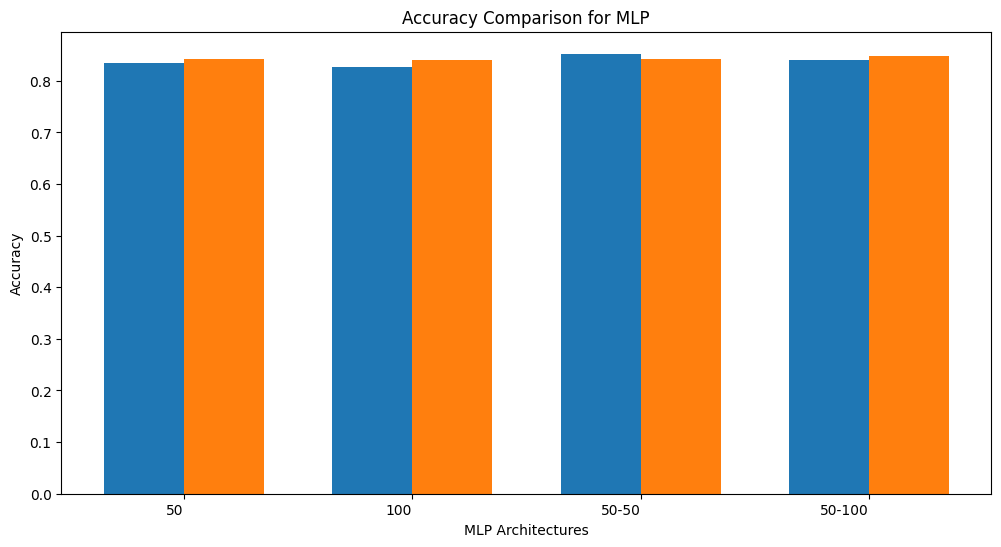

In [43]:
# Plotting the comparison

architectures = ['-'.join(str(layer) for layer in result['architecture']) for result in toReturn]
accuracies_tf = [result['accuracy_mlp_tf'] for result in toReturn]
accuracies_tfidf = [result['accuracy_mlp_tfidf'] for result in toReturn]

# Create an array of x-axis positions for bars
x = np.arange(len(architectures))
bar_width = 0.35

# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, accuracies_tf, bar_width, label='TF')
plt.bar(x + bar_width/2, accuracies_tfidf, bar_width, label='TF-IDF')
plt.xlabel('MLP Architectures')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for MLP')
plt.xticks(x, architectures, ha='right')
plt.show()


## Discussion and Analysis

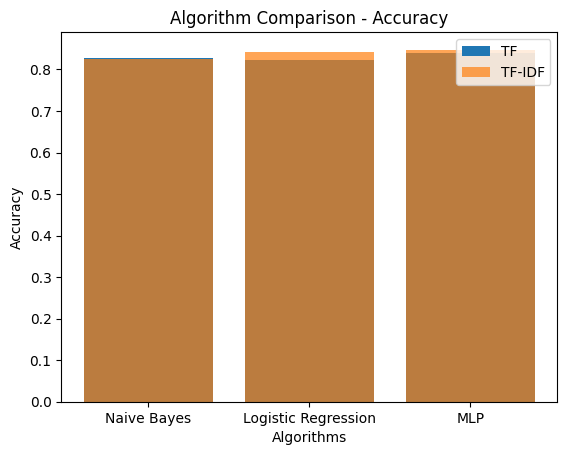

In [39]:
# Comparisons of all the algorithms
algo = ['Naive Bayes', 'Logistic Regression', 'MLP']
accuracy_tf = [accuracy_nb_tf, accuracy_lr_tf, accuracy_mlp_tf]
accuracy_tfidf = [accuracy_nb_tfidf, accuracy_lr_tfidf, accuracy_mlp_tfidf]

plt.bar(algo, accuracy_tf, label='TF')
plt.bar(algo, accuracy_tfidf, label='TF-IDF', alpha=0.7)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Percentage')
plt.title('Algorithm Comparison - Accuracy')
plt.legend()
plt.show()

## Comparing the results by all the algorithms:

The performance of each algorithm can vary based on several factors, such as pre-processing steps, the number of iterations, and the choice of parameters. In our analysis, we applied pre-processing steps such as tokenization using the NLTK Punkt tokenizer, removal of stop-words, and lemmatization. Furthermore, we trained all three algorithms — Multinomial Naive Bayes (NB), Logistic Regression, and Multilayer Perceptron (MLP) — using both Term Frequency (TF) and Term Frequency-Inverse Document Frequency (TF-IDF) feature representations.

In case of Naive Bayes, the performance was relatively consistent across both TF and TF-IDF, with accuracies of 82.75% for TF and 82.5% for TF-IDF. This slight preference for TF could be due to Naive Bayes' probabilistic nature, which may not fully leverage the additional information provided by TFIDF. 

Both MLP and Logistic Regression algorithms showed improved results with TF-IDF over TF. This outcome suggests that the weighting of terms provided by TF-IDF is beneficial in these models. 

The MLP algorithm was trained also using various architectures. MLP performed better with TF in the two-layer, 50-neuron each setup. However, in all other configurations — whether a single layer with 50 or 100 neurons, or a two-layer setup with 50 and 100 neurons, the algorithm showed better performance with TF-IDF. This suggests that the complexity of the network architecture can influence the effectiveness of the feature representation.

## Discussion Report:

Term Frequency (TF): TF simply counts the number of times word appear in a document. TF is easy to implement which can be helpful in case of simpler tasks.

Term Frequency-Inverse Document Frequency (TF-IDF): TFIDF changes the term frequency by scaling it with the inverse document frequency. This reduces the weight of terms that appear frequently in the document and vice versa. This leads to a more balanced representation where the importance of rare but significant terms are still highlighted.

We can decide the type of feature representations based on the task we have. While TF is simple and easy to implement, TFIDF balances the TF with the importance of terms which can often lead to better results.

## Comparsion of Algorithms:

Multinomial Naive Bayes : Naive Bayes is often considered as the baseline classifier for text classification tasks such as sentiment analysis. It is a simple classifier and is known for it's speed. However, it assumes that the tokens are independent, which is not the case in most situations where context and word order matter. Due to it's simplicity, it may not perform as well with complex features.

Logistic Regression : Logistic Regression can handle various relationships in data and does not assume it's independent in comparison to Naive Bayes. Even though it provides good results with feature engineering, it can struggle in case where there are non-linear relationships in data.

Multilayer Perceptron : MLP is a neural network architecture hence is capable of capturing complex relationships within data. It is also capable of modelling non-linear data but does require more computational resources to train the models depending on the size. 
